## Week 2. Exploratory Data Analysis

### Part 2: Data Visualization with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Python visualization libraries:

https://seaborn.pydata.org/

https://matplotlib.org/stable/tutorials/introductory/pyplot.html

### Example: Boston Housing Dataset 
##### _(modified)_

##### Data Dictionary

- CRIM &emsp; per capita crime rate
- ZN &emsp;       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS &emsp;    proportion of non-retail business acres per town
- CHAS&emsp;     does the tract bound the Charles River? (Yes / No)
- NOX&emsp;      nitric oxides concentration (parts per 10 million)
- RM&emsp;       average number of rooms per dwelling
- AGE&emsp;      proportion of owner-occupied units built prior to 1940
- DIS&emsp;      weighted distances to five Boston employment centres
- RAD&emsp;      index of accessibility to radial highways
- TAX&emsp;      full-value property-tax rate per USD 10,000
- PTRATIO&emsp;  pupil-teacher ratio by town
- LSTAT&emsp;    low-income population percentage
- MEDV&emsp;     Median value of owner-occupied homes in USD 1000's

In [2]:
bh = pd.read_csv('https://github.com/wsko/data_science_academy/raw/main/data/boston_housing_modified.csv') ## import data into a data frame

In [3]:
bh.info() ## high level overview (column names, data types, number of rows, missing data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    object 
 1   ZN       506 non-null    object 
 2   INDUS    506 non-null    object 
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    object 
 9   TAX      506 non-null    object 
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(7), object(6)
memory usage: 51.5+ KB


In [4]:
bh.describe() ## descriptive statistics for the numerical columns

,NOX,RM,AGE,DIS,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.554695,6.284634,68.574901,3.795043,18.455534,12.653063,22.532806
std,0.115878,0.702617,28.148861,2.105710,2.164946,7.141062,9.197104
min,0.385000,3.561000,2.900000,1.129600,12.600000,1.730000,5.000000
25%,0.449000,5.885500,45.025000,2.100175,17.400000,6.950000,17.025000
50%,0.538000,6.208500,77.500000,3.207450,19.050000,11.360000,21.200000
75%,0.624000,6.623500,94.075000,5.188425,20.200000,16.955000,25.000000
max,0.871000,8.780000,100.000000,12.126500,22.000000,37.970000,50.000000


In [5]:
bh.describe(include = 'object') ## overview of the categorical columns

,CRIM,ZN,INDUS,CHAS,RAD,TAX
count,506,506,506,506,506,506
unique,2,3,2,2,2,2
top,Low,Low,Low,No,Low,Low
freq,356,405,314,471,374,369


#### Univariate numerical data visualization

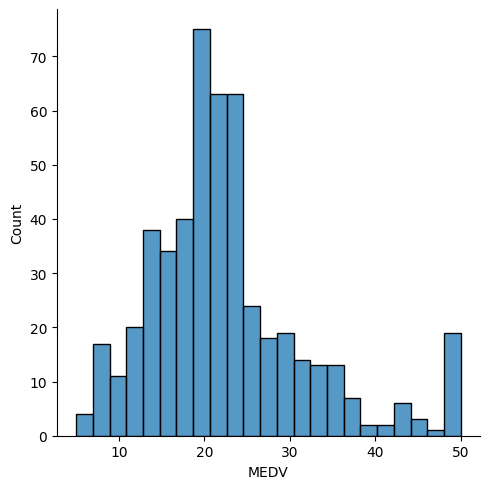

In [6]:
sns.displot(data = bh, x = 'MEDV')  #histogram
plt.show()

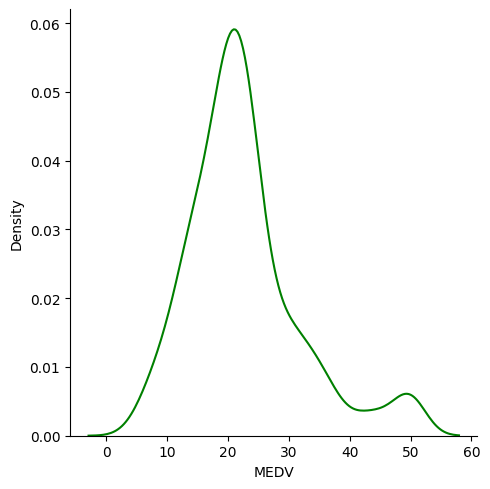

In [7]:
## denisty plot
sns.displot(data = bh, x = 'MEDV', kind = 'kde', color = "green")  ## density plot
plt.show()

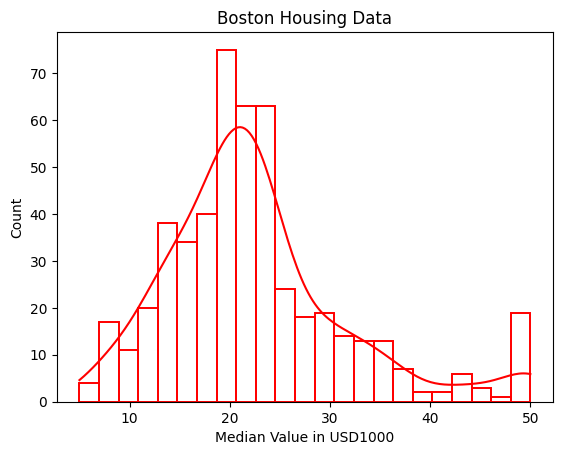

In [8]:
### graphics objects in Seaborn
### overlay density and histogram with histplot 
### add titles, labels etc. with ax. methods
ax = sns.histplot(data = bh, x = 'MEDV', kde = True, color = 'red', fill = False)
ax.set_title('Boston Housing Data')
ax.set_xlabel("Median Value in USD1000")
plt.show()

#### Univariate castegorical data visualization

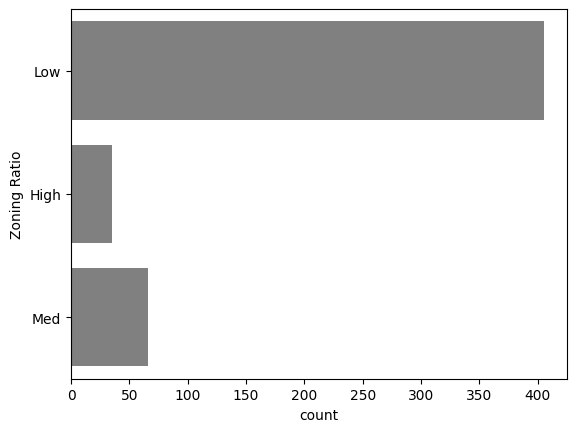

In [9]:
# countplot
ax = sns.countplot(data = bh, y = 'ZN', color = 'grey')
ax.set_ylabel("Zoning Ratio")
plt.show()

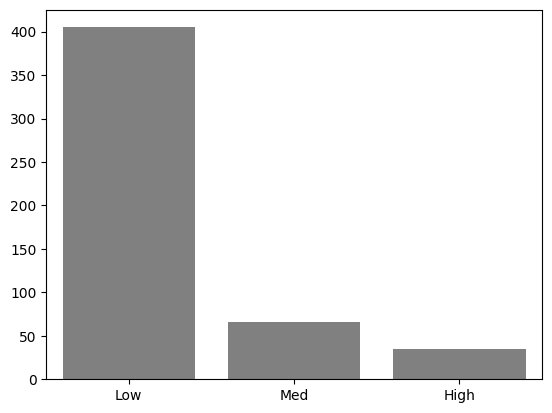

In [10]:
## same with barplot (more code to write). Advantage: sorted by the frequency
freq_table = bh['ZN'].value_counts()
sns.barplot(y = freq_table.values, x = freq_table.index, color = 'grey') 
plt.show()

__*What if we want to plot multiple countplots (for all categorical variables)?*__

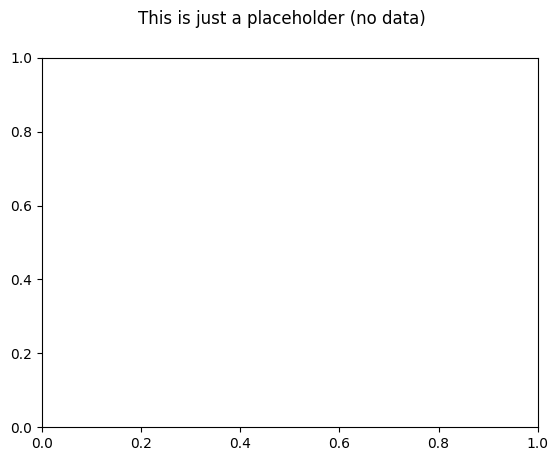

In [11]:
fig, ax = plt.subplots()
fig.suptitle('This is just a placeholder (no data)')
plt.show()

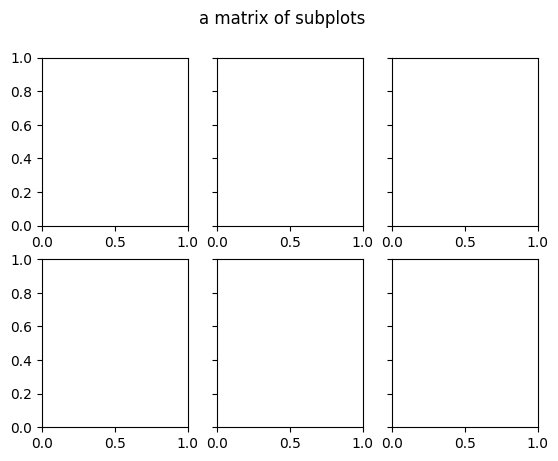

In [12]:
fig, axes = plt.subplots(2, 3, squeeze = False, sharey = True)
fig.suptitle('a matrix of subplots')
plt.show()

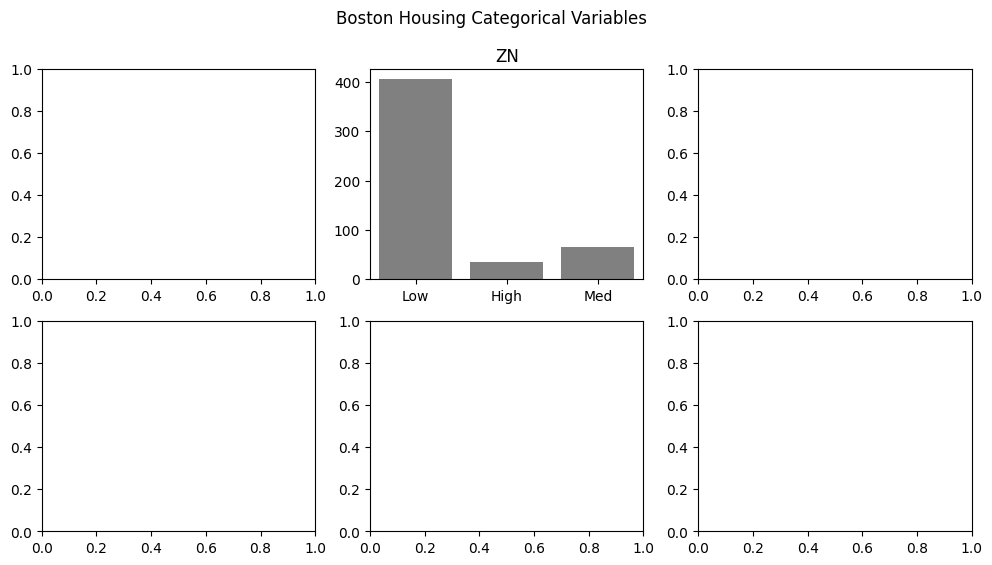

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Boston Housing Categorical Variables')
sns.countplot(ax = axes[0, 1], data = bh, x = 'ZN', color = 'grey')
axes[0, 1].set_title('ZN')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
plt.show()

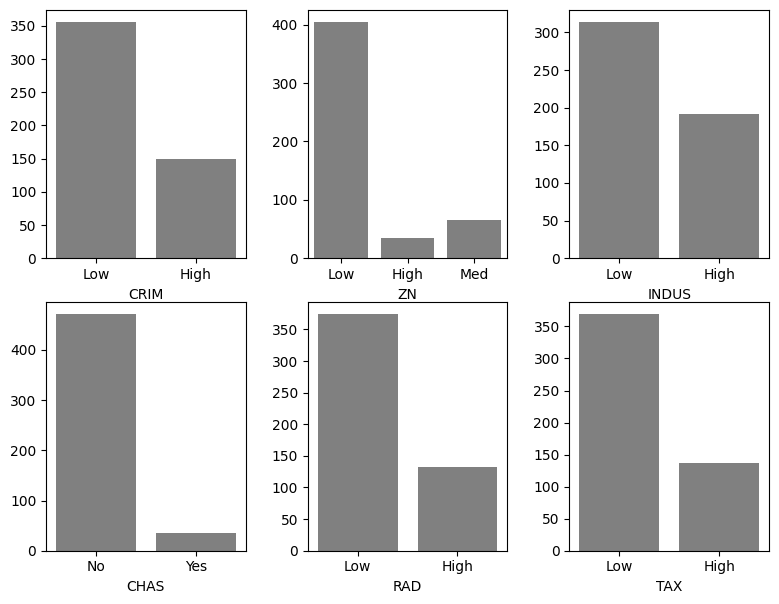

In [14]:
## we can repeat this for each of the categorical variable
## or we can populate the plots programmatically:

col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RAD', 'TAX']
ind = 0
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
fig.tight_layout()
for i in range(2):
    for j in range(3):
        sns.countplot(ax = axes[i, j], data = bh, x = col[ind], color = 'grey')
        #axes[i, j].set_title(col[ind])
        axes[i, j].set_xlabel(col[ind])
        axes[i, j].set_ylabel('')
        ind = ind + 1
plt.show()

#### Bivariate visualization: numerical - numerical

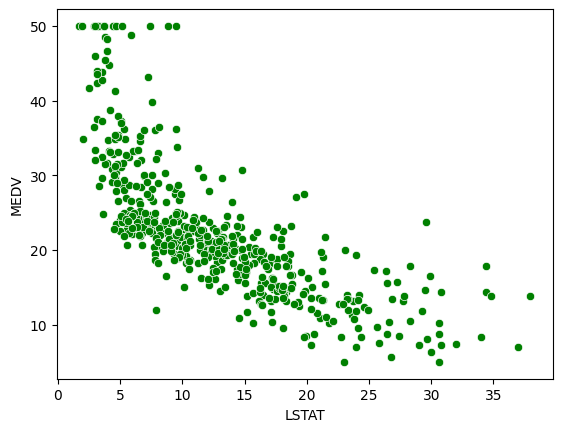

In [15]:
#### scatterplot (x-y plot)

ax = sns.scatterplot(data = bh, x = "LSTAT", y = "MEDV", color = 'green')

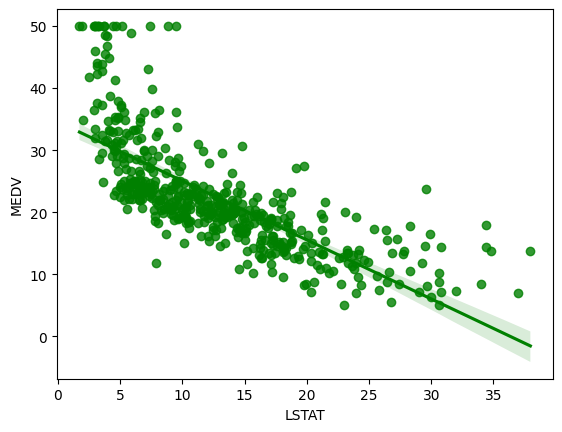

In [16]:
## regression plot
ax = sns.regplot(data = bh, x = "LSTAT", y = "MEDV", color = 'green')#, ci = 99.99)
#ax = sns.scatterplot(data = bh, x = "LSTAT", y = "MEDV", color = 'red')

In [17]:
## How do we visualize correlation?
bh.corr()

,NOX,RM,AGE,DIS,PTRATIO,LSTAT,MEDV
NOX,1.000000,-0.302188,0.731470,-0.769230,0.188933,0.590879,-0.427321
RM,-0.302188,1.000000,-0.240265,0.205246,-0.355501,-0.613808,0.695360
AGE,0.731470,-0.240265,1.000000,-0.747881,0.261515,0.602339,-0.376955
DIS,-0.769230,0.205246,-0.747881,1.000000,-0.232471,-0.496996,0.249929
PTRATIO,0.188933,-0.355501,0.261515,-0.232471,1.000000,0.374044,-0.507787
LSTAT,0.590879,-0.613808,0.602339,-0.496996,0.374044,1.000000,-0.737663
MEDV,-0.427321,0.695360,-0.376955,0.249929,-0.507787,-0.737663,1.000000


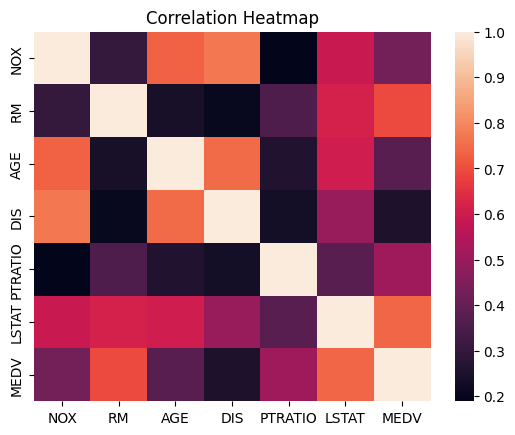

In [18]:
ax = sns.heatmap(abs(bh.corr()))  ## why abs values?
ax.set_title('Correlation Heatmap')
plt.show()

#### Bivariate visualization: categorical - numerical

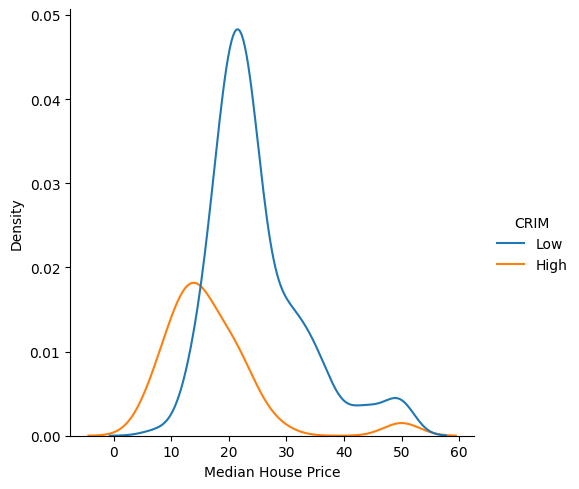

In [19]:
## conditional distribution plot
ax = sns.displot(data = bh, x = "MEDV", kind = 'kde', hue = "CRIM")
ax.set_xlabels("Median House Price")
plt.show()

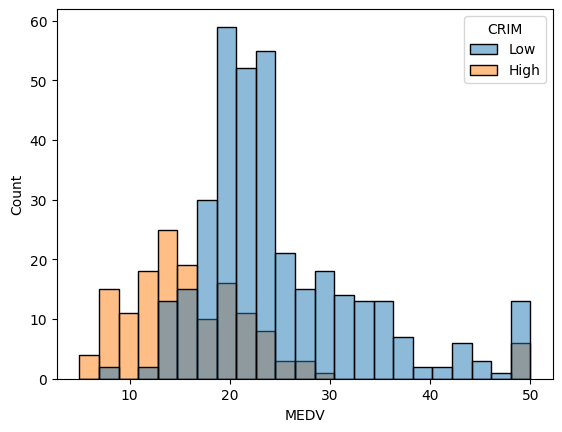

In [20]:
## conditional histograms
ax = sns.histplot(data = bh, x = "MEDV", hue = "CRIM")#, fill = False)

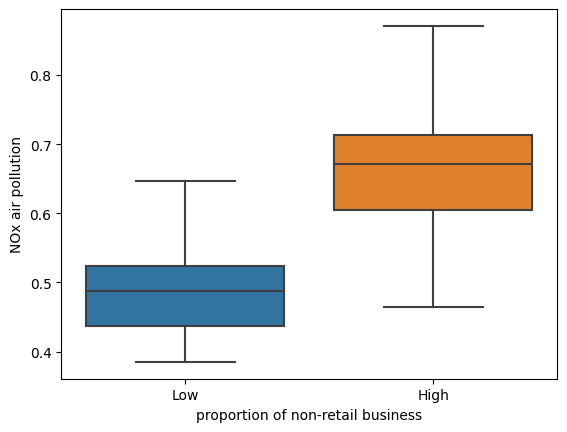

In [21]:
## Box plots
ax = sns.boxplot(data = bh, y = "NOX", x = "INDUS")
ax.set_xlabel("proportion of non-retail business")
ax.set_ylabel("NOx air pollution")
plt.show()
## when would box plots be more useful than conditional displots?

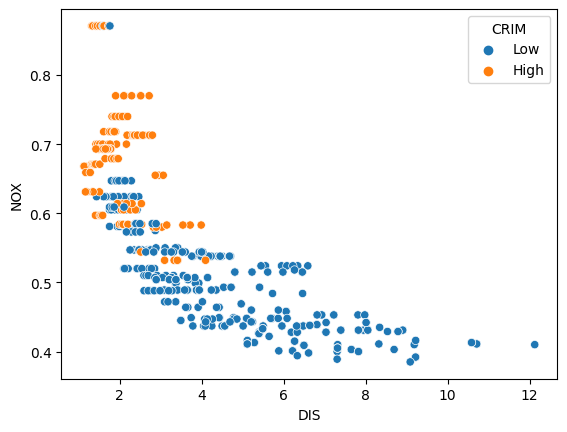

In [22]:
#colour-coded scatter plots (add a dimension with marker colour)
ax = sns.scatterplot(data = bh, x = "DIS", y = "NOX", hue = 'CRIM')

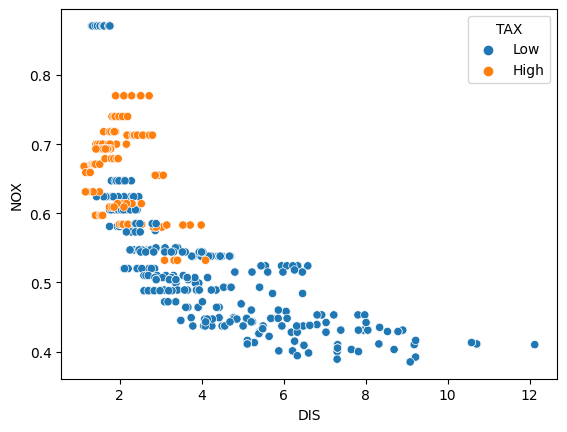

In [23]:
ax = sns.scatterplot(data = bh, x = "DIS", y = "NOX", hue = 'TAX')

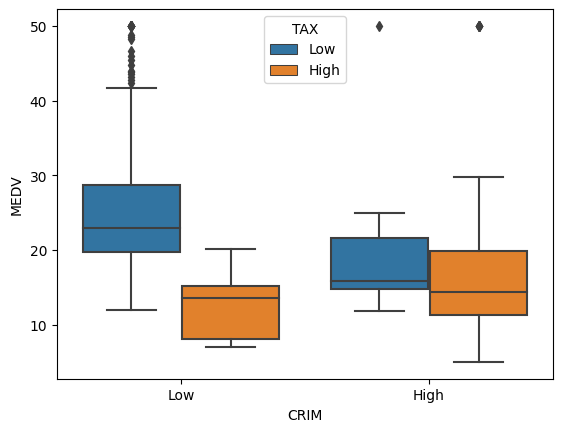

In [24]:
## multivariate box plot
ax = sns.boxplot(data = bh, x = "CRIM", y = "MEDV", hue = "TAX")

#### Bivariate visualization: categorical - categorical

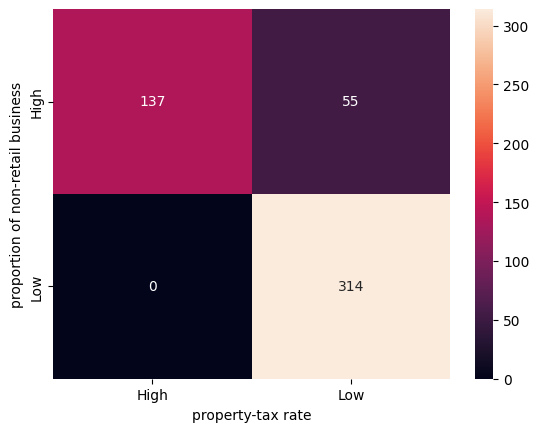

In [25]:
ax = sns.heatmap(pd.crosstab(index = bh["INDUS"], columns = bh["TAX"]), annot = True, fmt = "g") ## fmt = change notation to int
ax.set_ylabel("proportion of non-retail business")
ax.set_xlabel("property-tax rate")
plt.show()
## how do we interpret this?

#### More multi-variate visualizations

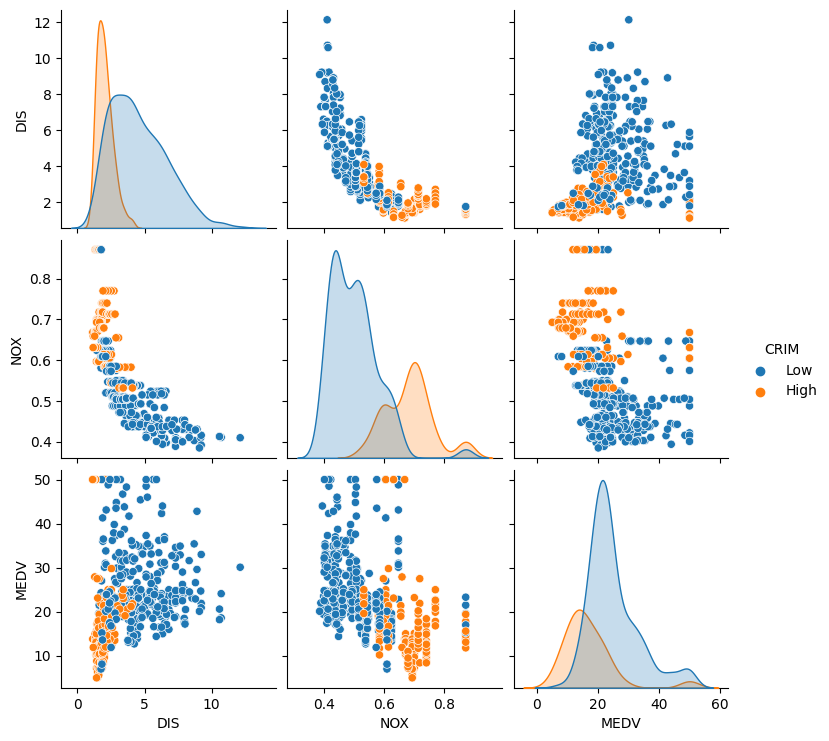

In [26]:
ax = sns.pairplot(bh[['DIS', 'NOX', 'MEDV', 'CRIM']], hue = "CRIM") ## this may take a while to compute
### all pairs of the numerical columns colour-coded by one categorical column

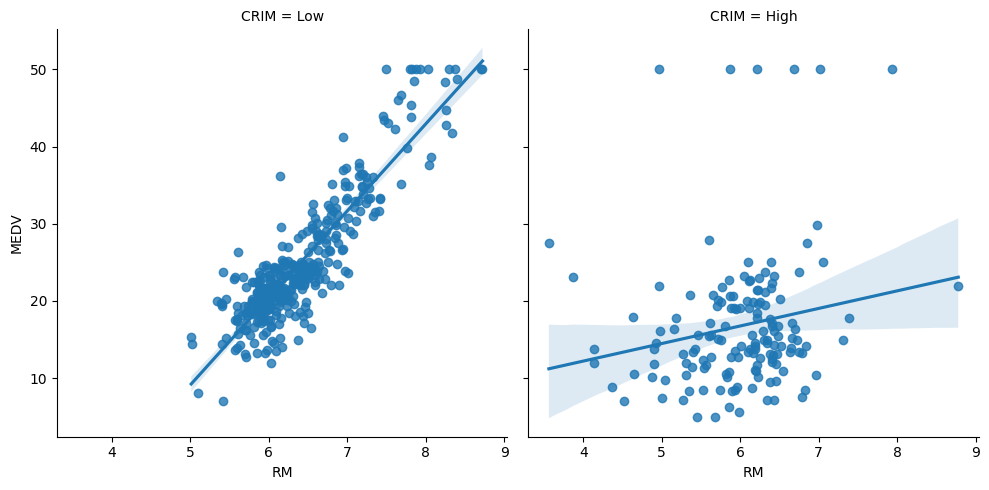

In [27]:
## two numerical variables (scatterplots) + columns for another categorical dimension
ax = sns.lmplot(data = bh, x='RM', y='MEDV', col='CRIM') ## col is column, not colour